In [21]:
import pandas
import seaborn
import numpy

# Scalability benchmark results

The SCIP tool ([commit](https://github.com/ScalableImagingPipeline/dask-pipeline/commit/db5adcd96ad4128e2dbba793676a0bc45ab00b18)) was ran on the Prism cluster on a Vulcan PBMC dataset of 1000 4-channel images. The amount of Dask worker processes was varied from 2 to 16, doubling the number of processes each time. Each measurement was repeated 3 times. Only one cluster node was used, which has 250GB of memory and 24 cores.

In [53]:
df = pandas.read_csv("../benchmark_results/db5adcd96ad4128e2dbba793676a0bc45ab00b18.csv")

In [54]:
df.shape

(12, 11)

In [55]:
df.head()

,n_workers,n_processes,local,headless,partition_size,output,config,paths,port,debug,runtime
0,1,4,False,True,50,/home/maximl/daskPipeline/benchmark_2021082711...,scip.yml,['/home/maximl/shared_scratch/vulcan_pbmc_1000'],NaN,False,278.168406
1,1,8,False,True,50,/home/maximl/daskPipeline/benchmark_2021082711...,scip.yml,['/home/maximl/shared_scratch/vulcan_pbmc_1000'],NaN,False,186.589405
2,1,8,False,True,50,/home/maximl/daskPipeline/benchmark_2021082711...,scip.yml,['/home/maximl/shared_scratch/vulcan_pbmc_1000'],NaN,False,181.909339
3,1,4,False,True,50,/home/maximl/daskPipeline/benchmark_2021082711...,scip.yml,['/home/maximl/shared_scratch/vulcan_pbmc_1000'],NaN,False,286.787316
4,1,16,False,True,50,/home/maximl/daskPipeline/benchmark_2021082711...,scip.yml,['/home/maximl/shared_scratch/vulcan_pbmc_1000'],NaN,False,134.052268


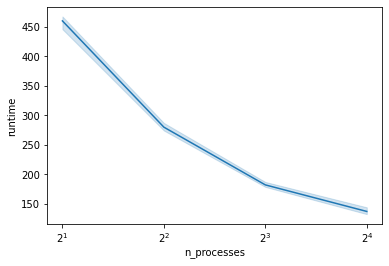

In [56]:
ax = seaborn.lineplot(data=df, x="n_processes", y="runtime", markers=True)
ax.set_xscale("log", basex=2)